In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
#
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [3]:
TRAIN_DIR = '/kaggle/input/face-expression-recognition-dataset/images/train/'
TEST_DIR = '/kaggle/input/face-expression-recognition-dataset/images/validation/'

In [4]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [5]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
print(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/face-expression-recognition-dataset/images/train/'

In [7]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

surprise Completed
fear Completed
angry Completed
neutral Completed
sad Completed
disgust Completed
happy Completed


,image,label
0,/kaggle/input/face-expression-recognition-data...,surprise
1,/kaggle/input/face-expression-recognition-data...,surprise
2,/kaggle/input/face-expression-recognition-data...,surprise
3,/kaggle/input/face-expression-recognition-data...,surprise
4,/kaggle/input/face-expression-recognition-data...,surprise


In [ ]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

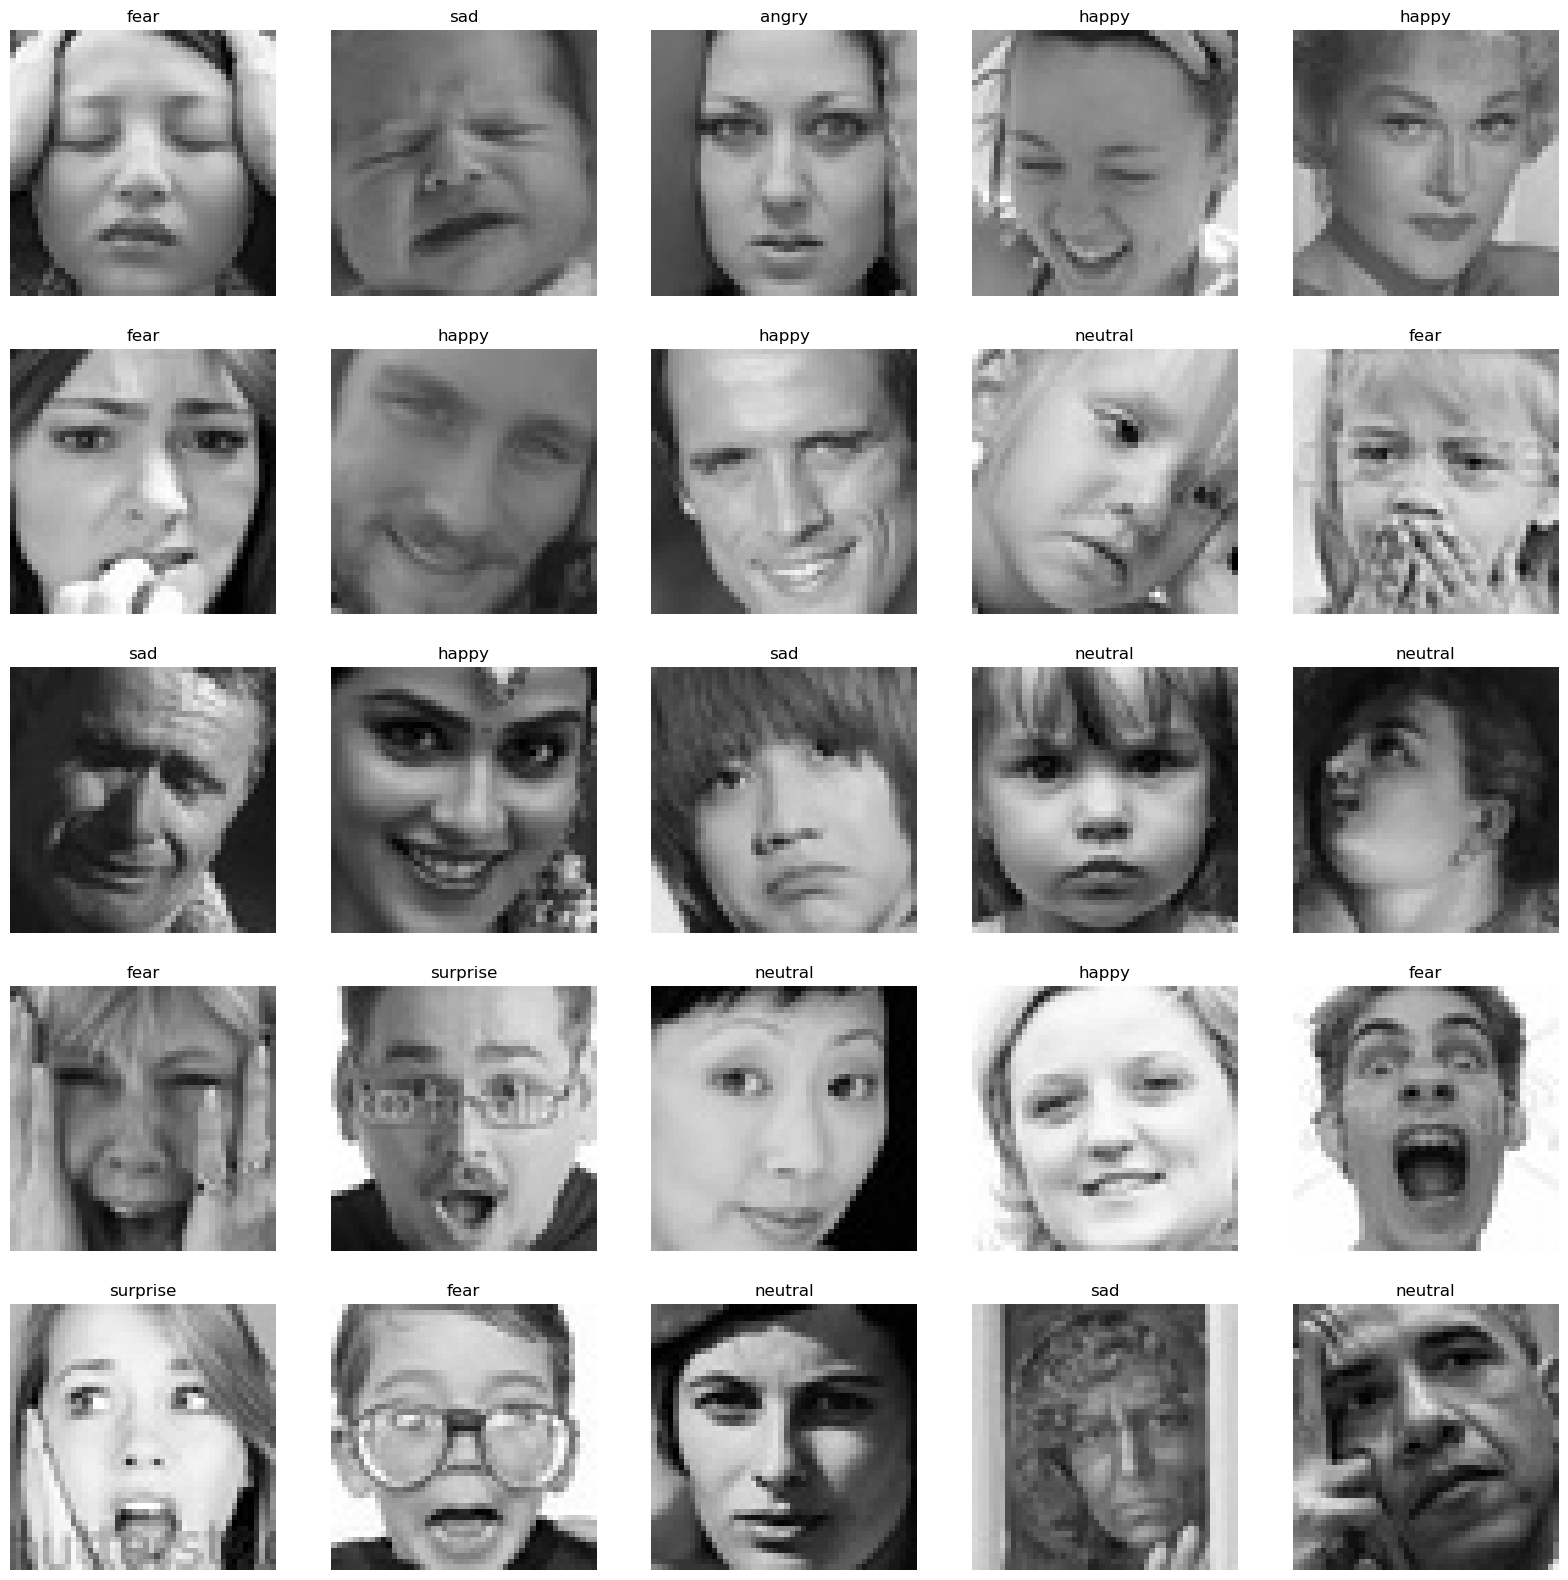

In [8]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [11]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [13]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
#

In [15]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [16]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
# config
input_shape = (48, 48, 1)
output_class = 7

In [20]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
# train the model

In [21]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100


2023-04-01 15:49:09.955278: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


226/226 [==============================] - 28s 53ms/step - loss: 1.8223 - accuracy: 0.2442 - val_loss: 1.8055 - val_accuracy: 0.2605
Epoch 2/100
226/226 [==============================] - 11s 48ms/step - loss: 1.7934 - accuracy: 0.2528 - val_loss: 1.7256 - val_accuracy: 0.2924
Epoch 3/100
226/226 [==============================] - 11s 48ms/step - loss: 1.6945 - accuracy: 0.3126 - val_loss: 1.5889 - val_accuracy: 0.3865
Epoch 4/100
226/226 [==============================] - 11s 49ms/step - loss: 1.5738 - accuracy: 0.3810 - val_loss: 1.4328 - val_accuracy: 0.4447
Epoch 5/100
226/226 [==============================] - 11s 49ms/step - loss: 1.4910 - accuracy: 0.4184 - val_loss: 1.3617 - val_accuracy: 0.4697
Epoch 6/100
226/226 [==============================] - 11s 49ms/step - loss: 1.4383 - accuracy: 0.4465 - val_loss: 1.3222 - val_accuracy: 0.4902
Epoch 7/100
226/226 [==============================] - 11s 50ms/step - loss: 1.3890 - accuracy: 0.4663 - val_loss: 1.2749 - val_accuracy: 0.51

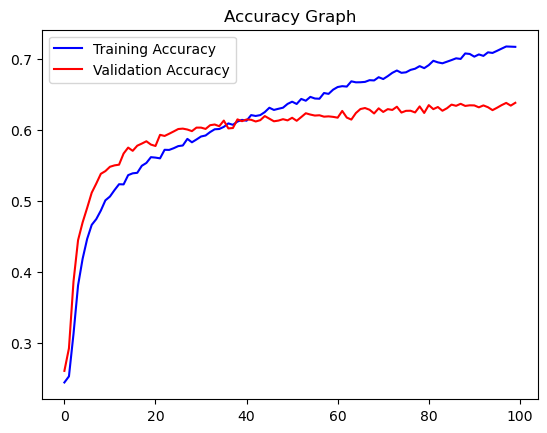

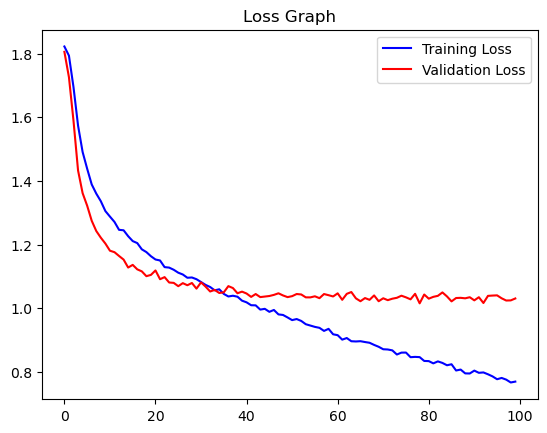

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

In [26]:
model.save('./Saved_model.h5')

In [27]:
model.save('Saved_model.pb')

In [28]:
model.save('Saved_model.pb')

Original Output: sad
1/1 [==============================] - 0s 301ms/step
Predicted Output: sad


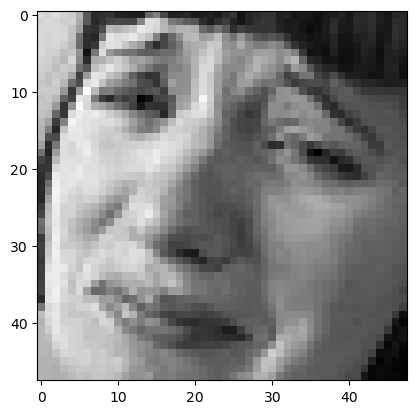

In [29]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: sad
1/1 [==============================] - 0s 21ms/step
Predicted Output: angry


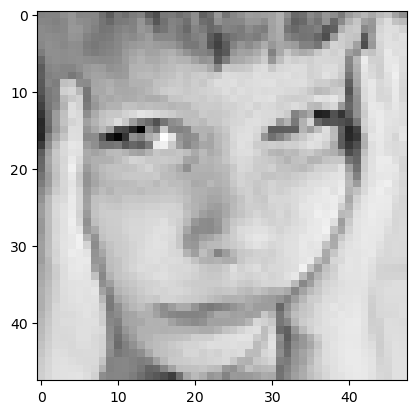

In [30]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: happy
1/1 [==============================] - 0s 21ms/step
Predicted Output: happy


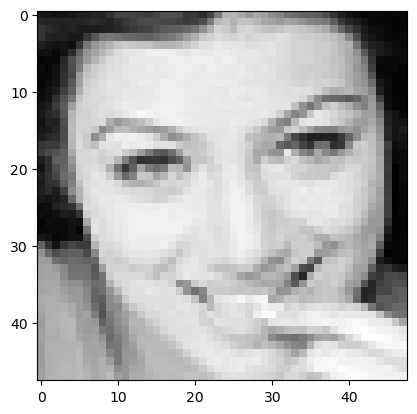

In [31]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');
